# Vader

In [1]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize,sent_tokenize
from tqdm import tqdm

In [3]:
vader_obj = SentimentIntensityAnalyzer()

## load data

In [4]:
import pandas as pd
file_path = '/Users/suqiulin/Downloads/160k.csv'
df=pd.read_csv(file_path)
df.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id
0,jaegarbong,"I have a feeling what you are asking for, but ...",2024-09-19 16:55:00,lnx7tpj,1fkpdzj,datascience,t5_2sptq
1,HammerPrice229,Have to agree (as someone trying to break in)....,2024-09-19 18:10:18,lnxmb0z,1fkpdzj,datascience,t5_2sptq
2,meloncholy,The PyData conferences usually have some good ...,2024-09-19 18:46:42,lnxt8w0,1fkpdzj,datascience,t5_2sptq
3,LyleLanleysMonorail,Coursera used to have a Practical Data Science...,2024-09-19 17:16:03,lnxbvt9,1fkpdzj,datascience,t5_2sptq
4,butyrospermumparkii,"On that note, [Spotify's engineering blog ](ht...",2024-09-19 18:13:40,lnxmy1o,1fkpdzj,datascience,t5_2sptq


In [5]:
df['body'] = df['body'].fillna("")  # Replace NaN with empty strings

# Get sentiment on sentencen level

In [10]:
def get_sentiment(text):
    if isinstance(text, str):
        return vader_obj.polarity_scores(text)
    else:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}  # Return neutral for non-strings

In [11]:
def get_sentiment_label(sentiment_scores):
    """Assign sentiment label based on VADER sentiment scores."""
    compound_score = sentiment_scores['compound']
    if compound_score > 0.05:
        return 'pos'
    elif compound_score < -0.05:
        return 'neg'
    else:
        return 'neu'

In [7]:
def truncate_to_max_length(text, max_length=512):
    # Ensure the input is a valid string
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string inputs
    
    # Tokenize the input text into words
    words = word_tokenize(text)
    
    # Truncate the list of words to the maximum length (512 tokens/words)
    truncated_words = words[:max_length]
    
    # Join the truncated words back into a string
    truncated_text = ' '.join(truncated_words)
    
    return truncated_text

In [12]:
# List to store the results
results = []

# Iterate through the dataframe
for index, row in tqdm(df.iterrows(), total=len(df), ncols=100):
    review = row['body']
    subreddit = row['subreddit']
    created_utc = row['created_utc']

    # Sentence tokenization
    for sentence in sent_tokenize(review):
        truncated_sentence = truncate_to_max_length(sentence, max_length=512)

        # Get sentiment for the sentence using Vader
        sentiment_scores = vader_obj.polarity_scores(truncated_sentence)
        compound = sentiment_scores['compound']
        sentiment_label = get_sentiment_label(sentiment_scores)
        # Append results
        results.append({
            "subreddit": subreddit,
            "created_utc": created_utc,
            "sentence": truncated_sentence,
            "sentiment_scores": compound,
            "polarity": sentiment_label
        })

100%|█████████████████████████████████████████████████████| 161552/161552 [00:32<00:00, 4979.58it/s]


# Export and Visualize results

In [13]:
df_results = pd.DataFrame(results)
df_results.to_csv('/Users/suqiulin/Downloads/sentiment_by_vader_sentlevel.csv', index=False)

In [16]:
df_results.head()

,subreddit,created_utc,sentence,sentiment_scores,polarity
0,datascience,2024-09-19 16:55:00,"I have a feeling what you are asking for , but...",-0.3666,neg
1,datascience,2024-09-19 16:55:00,however : Try blogs of major companies .,0.0000,neu
2,datascience,2024-09-19 16:55:00,"I used to read Netflix Engineering blog , wher...",0.0000,neu
3,datascience,2024-09-19 16:55:00,Being a gamer I also read Ubi Riot and Activis...,-0.8442,neg
4,datascience,2024-09-19 16:55:00,And how is not finding insight a part of data ...,0.0000,neu


In [17]:
df_results.shape

(438484, 5)

In [14]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [15]:
df_results['polarity'].value_counts()

polarity
neu    173686
pos    161112
neg    103686
Name: count, dtype: int64

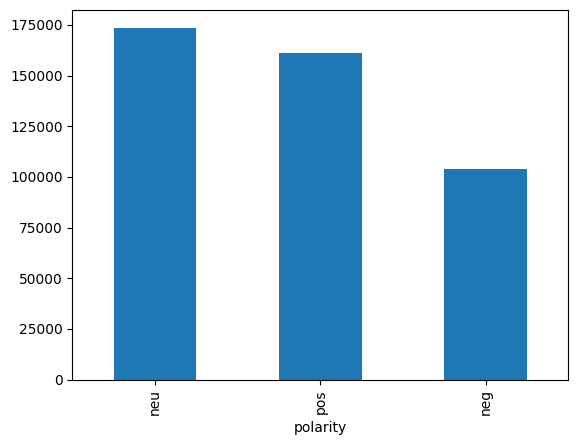

In [19]:
df_results['polarity'].value_counts().plot(kind='bar')
plt.show()

# Evaluation

In [20]:
import pandas as pd
file_path = '/Users/suqiulin/Downloads/labelled_dataset_gpt4o.csv'
df1=pd.read_csv(file_path)
df1.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id,label
0,nodesign89,So nothing new?,9/8/2024 18:09,lm5go3e,1fc2c3m,technology,t5_2qh16,NEUTRAL
1,rangeo,Wayback I used to enjoy the random click to so...,9/19/2024 16:23,lnx1rfk,1fkg9y6,technology,t5_2qh16,NEUTRAL
2,OMG__Ponies,"Has it? IDK. If so, they may be out of jobs as...",9/18/2024 0:54,lnnw1fj,1fjc1an,technology,t5_2qh16,NEGATIVE
3,QueenOfQuok,I want to write a book *specifically so it can...,9/6/2024 11:17,lls097x,1f9vq81,technology,t5_2qh16,POSITIVE
4,valacious,"I hear you, and totally agree, I don’t own a t...",9/6/2024 3:48,llqrf4x,1f9n7pc,cybersecurity,t5_2u559,NEUTRAL


In [21]:
df1.shape

(10000, 8)

In [22]:
def get_sentiment_label1(polarity):
    """Assign sentiment label based on polarity score."""
    if polarity == "POSITIVE":
        return 'pos'
    elif polarity == "NEGATIVE":
        return 'neg'
    else:
        return 'neu'

In [24]:
eval = []
for index, row in tqdm(df1.iterrows(), total=len(df1), ncols=100):
    review = row['body']
    label = get_sentiment_label1(row['label'])
    subreddit = row['subreddit']
    created_utc = row['created_utc']

    # Sentence tokenization
    for sentence in sent_tokenize(review):
        truncated_sentence = truncate_to_max_length(sentence, max_length=512)

        # Get sentiment for the sentence using Vader
        sentiment_scores = vader_obj.polarity_scores(truncated_sentence)
        compound = sentiment_scores['compound']
        sentiment_label = get_sentiment_label(sentiment_scores)
        # Append results
        eval.append({
            "subreddit": subreddit,
            "created_utc": created_utc,
            "sentence": truncated_sentence,
            "sentiment_scores": sentiment_scores,
            "predicted_polarity": sentiment_label,
            'labeled_polarity':label
        })

100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4826.16it/s]


In [26]:
# to compare sentence level sentiment on the gpt labelled dataset
df_eval = pd.DataFrame(eval)
df_eval.head()

,subreddit,created_utc,sentence,sentiment_scores,predicted_polarity,labeled_polarity
0,technology,9/8/2024 18:09,So nothing new ?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
1,technology,9/19/2024 16:23,Wayback I used to enjoy the random click to so...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",pos,neu
2,technology,9/19/2024 16:23,I have about 4 specific channels ( Rick beato ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
3,technology,9/19/2024 16:23,I look at and spend 0 time looking at or for n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
4,technology,9/18/2024 0:54,Has it ?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neg


In [25]:
!pip install seaborn
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [27]:
y_true = df_eval['labeled_polarity']
y_pred = df_eval['predicted_polarity']
cm = confusion_matrix(y_true, y_pred, labels=['pos', 'neg', 'neu'])

# Compute accuracy
true_positives = cm.diagonal()
total_actual = cm.sum(axis=1)

# Calculate per-class accuracy
accuracy_per_class = true_positives / total_actual
accuracy_pos, accuracy_neg, accuracy_neu = accuracy_per_class


# Compute recall (per class average)
recall = recall_score(y_true, y_pred, average=None, labels=['pos', 'neg', 'neu'])

# Compute F1 Score
f1_scores = f1_score(y_true, y_pred, labels=['pos', 'neg', 'neu'], average=None)
f1_pos, f1_neg, f1_neu = f1_scores

# Type 1 Error (False Positive Rate) - per class
type_1_error = 1 - recall  # Since FPR = 1 - recall (when averaged across classes)

# Compute Type 2 Error (False Negative Rate)
# Type 2 error (FNR) is simply: 1 - recall per class
type_2_error = 1 - recall

# Output the results
print(f"Confusion Matrix:\n{cm}")
print(f"Recall (per class): {recall}")
print(f"Type 1 Error (per class): {type_1_error}")
print(f"Type 2 Error (per class): {type_2_error}")

# Print accuracy for each class
print(f"Accuracy for 'pos': {accuracy_pos}")
print(f"Accuracy for 'neg': {accuracy_neg}")
print(f"Accuracy for 'neu': {accuracy_neu}")

# Print F1 scores for each class
print(f"F1 Score for 'pos': {f1_pos}")
print(f"F1 Score for 'neg': {f1_neg}")
print(f"F1 Score for 'neu': {f1_neu}")

Confusion Matrix:
[[2117  440 1209]
 [2964 3587 3453]
 [5104 2464 6071]]
Recall (per class): [0.56213489 0.35855658 0.44512061]
Type 1 Error (per class): [0.43786511 0.64144342 0.55487939]
Type 2 Error (per class): [0.43786511 0.64144342 0.55487939]
Accuracy for 'pos': 0.5621348911311737
Accuracy for 'neg': 0.3585565773690524
Accuracy for 'neu': 0.44512061001539704
F1 Score for 'pos': 0.303490789190739
F1 Score for 'neg': 0.43491967262806913
F1 Score for 'neu': 0.4981946495978992


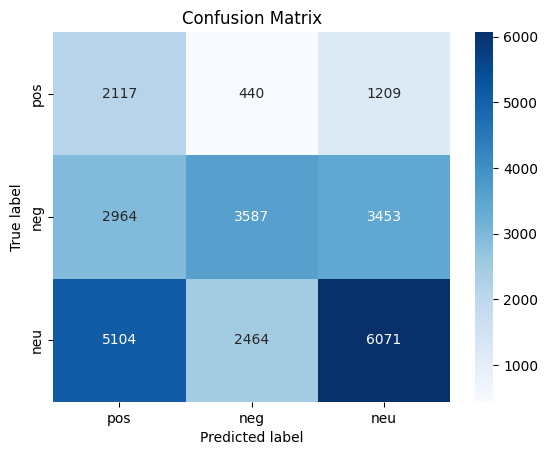

In [28]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['pos', 'neg', 'neu'], yticklabels=['pos', 'neg', 'neu'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()